# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br> : Because it can be used in many different use cases, such as in facial recognition for social media

**The objectives:** What is the intended goal?<br> To accurately determine the facial expression of a person

**The key questions:** What are the key questions that need to be answered?<br>
What are the features that differentiate facial expressions and how can we capture those in CNNs

**The problem formulation:** What are we trying to solve using data science?
We are trying to solve the issue of facial expression classification



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import random

import zipfile
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory

# To create an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D

# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# To load the model
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers.legacy import Adam

# To evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [ ]:
!nvidia-smi

Fri Jun  9 00:42:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    51W / 400W |   5061MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Facial_Emotes/Facial_emotion_images.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()






## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:** These images tend to have the person smiling, with the mouth wide and slightly open, sometimes exposing the upper teeth. eyes tend to be sightly closed and the eybrows are slightly raised.

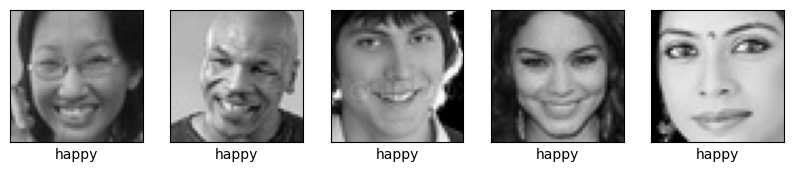

In [ ]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(base_path):
    images = []
    for i in range(5):  
        img_files = os.listdir(base_path)
        img = load_img(os.path.join(base_path, img_files[i]))
        img_array = img_to_array(img)
        images.append(img_array)
    return images

train_dir = "/tmp/Facial_emotion_images/train/happy"  
images = load_images(train_dir)


plt.figure(figsize=(10,10))
for i in range(5):  
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype(np.uint8))
    plt.xlabel('happy')
plt.show()



### **Sad**

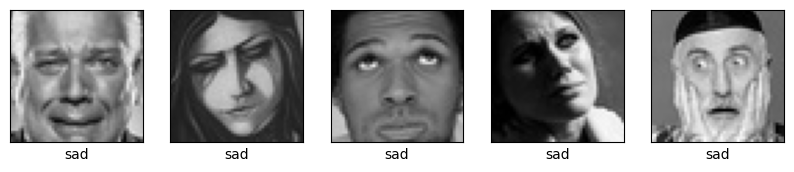

In [ ]:
train_dir = "/tmp/Facial_emotion_images/train/sad"  
images = load_images(train_dir)


plt.figure(figsize=(10,10))
for i in range(5):  
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype(np.uint8))
    plt.xlabel('sad')
plt.show()

**Observations and Insights:** These images have the user frowning and puting their lips out, the eyes seem to be neutral along with the eyebrows.

### **Neutral**

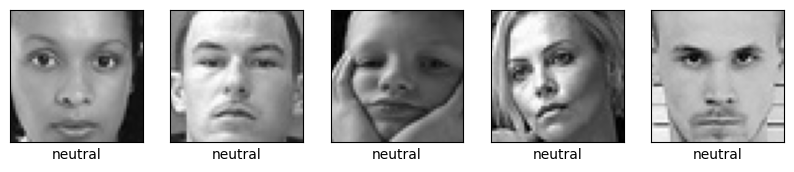

In [ ]:
train_dir = "/tmp/Facial_emotion_images/train/neutral"
images = load_images(train_dir)


plt.figure(figsize=(10,10))
for i in range(5):  
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype(np.uint8))
    plt.xlabel('neutral')
plt.show()

**Observations and Insights:** These images have the person with a close, straight mouth, eith neutral eyes and lower eyebrows.

### **Surprised**

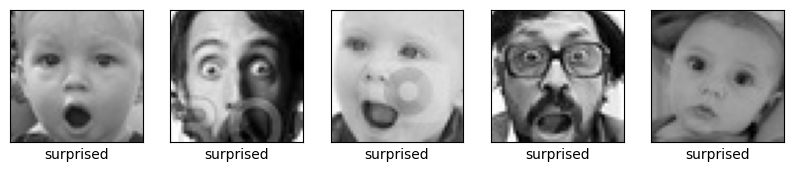

In [ ]:
train_dir = "/tmp/Facial_emotion_images/train/surprise"  
images = load_images(train_dir)


plt.figure(figsize=(10,10))
for i in range(5):  
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype(np.uint8))
    plt.xlabel('surprised')
plt.show()

**Observations and Insights:** These images have the user with a gaping round mouth, widely opened eyes and raised eyebrows. Additionally, a lot of the images have the person placing their hands on their face

## **Checking Distribution of Classes**

In [ ]:
directory_path = "/tmp/Facial_emotion_images/train/sad"
print("amount of sad images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/sad"
print("amount of sad images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/happy"
print("amount of happy images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/happy"
print("amount of happy images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/neutral"
print("amount of neutral images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/neutral"
print("amount of neutral images in validation: " + str(len(os.listdir(directory_path))))

directory_path = "/tmp/Facial_emotion_images/train/surprise"
print("amount of surprised images in train: " + str(len(os.listdir(directory_path))))
directory_path = "/tmp/Facial_emotion_images/validation/surprise"
print("amount of surprised images in validation: " + str(len(os.listdir(directory_path))))

amount of sad images in train: 3982
amount of sad images in validation: 1139
amount of happy images in train: 3976
amount of happy images in validation: 1825
amount of neutral images in train: 3978
amount of neutral images in validation: 1216
amount of surprised images in train: 3173
amount of surprised images in validation: 797


**Observations and Insights:* Although there are a similar amount of sad, happy, and neutral images in the training set, there are slightly less surpised images (~800 less), but the fact that there are around 4000 images for each set, I don't beliueve this difference to be too large. For the validation set however, there is a large spike in the amount of happy images, and a dip in the amount of surprised images, resulting in a difference of 1000 images between the 2. This difference seems significant, and this could be mititgated by truncating the amoutn of images in the valdiation set so each label has a similar amount. 

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
image_size = (256, 256)
batch_size = 1

# Load training dataset
train_dir = "/tmp/Facial_emotion_images/train"
train_ds_gray = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale")
train_ds_rgb = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb")

# Load validation dataset
val_dir = "/tmp/Facial_emotion_images/validation"
val_ds_gray = image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale")
val_ds_rgb = image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb")

# Load test dataset
test_dir = "/tmp/Facial_emotion_images/test"
test_ds_gray = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale')
test_ds_rgb = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='rgb')



def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=4)
    return image, label

# Apply one_hot_encode function to the datasets
train_ds_gray = train_ds_gray.map(one_hot_encode)
val_ds_gray = val_ds_gray.map(one_hot_encode)
train_ds_rgb = train_ds_rgb.map(one_hot_encode)
val_ds_rgb = val_ds_rgb.map(one_hot_encode)
test_ds_gray = test_ds_gray.map(one_hot_encode)
test_ds_rgb = test_ds_rgb.map(one_hot_encode)





Found 15109 files belonging to 4 classes.
Found 15109 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


In [ ]:
def image_array(ds):

  images = []


  for image, label in ds:
      images.append(image.numpy())  

  images = np.array(images)
  images = np.squeeze(images, axis=1)
  return images

def label_array(ds):
  labels = []

  for image, label in ds:

      labels.append(label.numpy())  
  
  labels = np.array(labels)
  labels = np.squeeze(labels, axis=1)
  return labels

train_X_rgb = image_array(train_ds_rgb)
train_Y_rgb = label_array(train_ds_rgb)

test_X_rgb = image_array(test_ds_rgb)
test_Y_rgb = label_array(test_ds_rgb)

val_X_rgb = image_array(val_ds_rgb)
val_Y_rgb = label_array(val_ds_rgb)




In [ ]:
train_X_gray = image_array(train_ds_gray)
train_Y_gray = label_array(train_ds_gray)

test_X_gray = image_array(test_ds_gray)
test_Y_gray = label_array(test_ds_gray)

val_X_gray = image_array(val_ds_gray)
val_Y_gray = label_array(val_ds_gray)

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [ ]:
num_samples = 15109
steps_per_epoch = 75

num_val_samples = 4977
val_steps = 24

def cnn_model_gray_1():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 1)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def cnn_model_rgb_1():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 3)))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(alpha=0.1))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_gray_1 = cnn_model_gray_1()
print(model_gray_1.summary())

model_rgb_1 = cnn_model_rgb_1()
print(model_rgb_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                        

In [ ]:
!cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2

### **Compiling and Training the Model**

In [ ]:
#Adding earlystop callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)



history_gray_1 = model_gray_1.fit(
    train_X_gray,
    train_Y_gray, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 6s 54ms/step - loss: 933.1256 - accuracy: 0.2532 - val_loss: 19.9027 - val_accuracy: 0.2184
Epoch 2/20
75/75 [==============================] - 3s 36ms/step - loss: 9.2744 - accuracy: 0.2519 - val_loss: 9.5415 - val_accuracy: 0.2677
Epoch 3/20
75/75 [==============================] - 3s 38ms/step - loss: 11.6953 - accuracy: 0.2512 - val_loss: 5.2794 - val_accuracy: 0.2637
Epoch 4/20
75/75 [==============================] - 3s 36ms/step - loss: 9.7775 - accuracy: 0.2505 - val_loss: 4.3611 - val_accuracy: 0.2568
Epoch 5/20
75/75 [==============================] - 3s 36ms/step - loss: 10.3282 - accuracy: 0.2690 - val_loss: 9.3499 - val_accuracy: 0.2531
Epoch 6/20
75/75 [==============================] - 3s 36ms/step - loss: 6.6144 - accuracy: 0.2587 - val_loss: 5.6209 - val_accuracy: 0.2647
Epoch 7/20
75/75 [==============================] - 3s 36ms/step - loss: 5.5574 - accuracy: 0.2571 - val_loss: 7.8801 - val_accuracy: 0.2578
Epoch 8/

In [ ]:
history_rgb_1 = model_rgb_1.fit(
    train_X_rgb,
    train_Y_rgb, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 7s 88ms/step - loss: 980.2750 - accuracy: 0.2613 - val_loss: 6.7341 - val_accuracy: 0.2349
Epoch 2/20
75/75 [==============================] - 4s 52ms/step - loss: 13.4690 - accuracy: 0.2420 - val_loss: 13.8094 - val_accuracy: 0.1923
Epoch 3/20
75/75 [==============================] - 4s 52ms/step - loss: 10.4684 - accuracy: 0.2540 - val_loss: 5.7080 - val_accuracy: 0.1929
Epoch 4/20
75/75 [==============================] - 4s 51ms/step - loss: 5.7661 - accuracy: 0.2580 - val_loss: 8.0275 - val_accuracy: 0.2660
Epoch 5/20
75/75 [==============================] - 4s 52ms/step - loss: 6.7018 - accuracy: 0.2632 - val_loss: 4.6014 - val_accuracy: 0.2644
Epoch 6/20
75/75 [==============================] - 4s 52ms/step - loss: 5.6083 - accuracy: 0.2800 - val_loss: 3.8781 - val_accuracy: 0.2025
Epoch 7/20
75/75 [==============================] - 4s 51ms/step - loss: 2.9235 - accuracy: 0.3035 - val_loss: 2.6823 - val_accuracy: 0.2363
Epoch 8/

### **Evaluating the Model on the Test Set**

In [ ]:
pred_gray_1 = model_gray_1.predict(test_X_gray)
pred_gray_1 = [np.argmax(i) for i in pred_gray_1]

pred_rgb_1 = model_rgb_1.predict(test_X_rgb)
pred_rgb_1 = [np.argmax(i) for i in pred_rgb_1]

print(np.array(pred_rgb_1).shape)

4/4 [==============================] - 0s 10ms/step
(128,)


In [ ]:
test_labels_rgb = [np.argmax(i) for i in test_Y_rgb]
test_labels_gray = [np.argmax(i) for i in test_Y_gray]

print(np.array(test_labels_rgb).shape)

(128,)


In [ ]:
print(classification_report(test_labels_rgb, pred_rgb_1))

print(classification_report(test_labels_gray, pred_gray_1))

              precision    recall  f1-score   support

           0       0.60      0.09      0.16        32
           1       0.28      0.88      0.42        32
           2       0.00      0.00      0.00        32
           3       0.10      0.06      0.08        32

    accuracy                           0.26       128
   macro avg       0.24      0.26      0.17       128
weighted avg       0.24      0.26      0.17       128

              precision    recall  f1-score   support

           0       0.29      0.12      0.17        32
           1       0.25      0.66      0.36        32
           2       0.17      0.03      0.05        32
           3       0.33      0.25      0.29        32

    accuracy                           0.27       128
   macro avg       0.26      0.27      0.22       128
weighted avg       0.26      0.27      0.22       128



**Observations and Insights:__** The gray model performs better on precision, recall and f1-score


### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

In [ ]:
def cnn_model_gray_2():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 1)))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model
def cnn_model_rgb_2():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 3)))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_gray_2 = cnn_model_gray_2()
print(model_gray_2.summary())

model_rgb_2 = cnn_model_rgb_2()
print(model_rgb_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                          

### **Compiling and Training the Model**

In [ ]:
#Adding earlystop callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)

history_gray_2 = model_gray_2.fit(
    train_X_gray,
    train_Y_gray, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 17s 80ms/step - loss: 12.2110 - accuracy: 0.2498 - val_loss: 9.4063 - val_accuracy: 0.2280
Epoch 2/20
75/75 [==============================] - 4s 54ms/step - loss: 7.8745 - accuracy: 0.2683 - val_loss: 3.6829 - val_accuracy: 0.2766
Epoch 3/20
75/75 [==============================] - 4s 59ms/step - loss: 4.7369 - accuracy: 0.2576 - val_loss: 3.7624 - val_accuracy: 0.2631
Epoch 4/20
75/75 [==============================] - 4s 54ms/step - loss: 3.5700 - accuracy: 0.2548 - val_loss: 1.6850 - val_accuracy: 0.2700
Epoch 5/20
75/75 [==============================] - 4s 54ms/step - loss: 3.3495 - accuracy: 0.2611 - val_loss: 2.2703 - val_accuracy: 0.2713
Epoch 6/20
75/75 [==============================] - 4s 54ms/step - loss: 2.2248 - accuracy: 0.2564 - val_loss: 1.4721 - val_accuracy: 0.2581
Epoch 7/20
75/75 [==============================] - 4s 54ms/step - loss: 2.3439 - accuracy: 0.2546 - val_loss: 1.8365 - val_accuracy: 0.2707
Epoch 8/20


In [ ]:
history_rgb_2 = model_rgb_2.fit(
    train_X_rgb,
    train_Y_rgb, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 9s 108ms/step - loss: 14.3071 - accuracy: 0.2592 - val_loss: 30.1384 - val_accuracy: 0.2310
Epoch 2/20
75/75 [==============================] - 5s 70ms/step - loss: 9.6706 - accuracy: 0.2473 - val_loss: 4.7453 - val_accuracy: 0.2611
Epoch 3/20
75/75 [==============================] - 5s 70ms/step - loss: 5.9543 - accuracy: 0.2440 - val_loss: 3.9570 - val_accuracy: 0.2766
Epoch 4/20
75/75 [==============================] - 5s 71ms/step - loss: 4.1874 - accuracy: 0.2505 - val_loss: 1.9879 - val_accuracy: 0.2674
Epoch 5/20
75/75 [==============================] - 5s 69ms/step - loss: 3.0159 - accuracy: 0.2629 - val_loss: 1.8324 - val_accuracy: 0.2647
Epoch 6/20
75/75 [==============================] - 5s 70ms/step - loss: 2.3088 - accuracy: 0.2590 - val_loss: 2.4623 - val_accuracy: 0.2522
Epoch 7/20
75/75 [==============================] - 5s 70ms/step - loss: 2.0886 - accuracy: 0.2794 - val_loss: 1.5328 - val_accuracy: 0.2555
Epoch 8/20

### **Evaluating the Model on the Test Set**

In [ ]:
pred_gray_2 = model_gray_2.predict(test_X_gray)
pred_gray_2 = [np.argmax(i) for i in pred_gray_2]

pred_rgb_2 = model_rgb_2.predict(test_X_rgb)
pred_rgb_2 = [np.argmax(i) for i in pred_rgb_2]

test_labels_rgb = [np.argmax(i) for i in test_Y_rgb]
test_labels_gray = [np.argmax(i) for i in test_Y_gray]

print(classification_report(test_labels_rgb, pred_rgb_2))

print(classification_report(test_labels_gray, pred_gray_2))

4/4 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.20      0.34      0.25        32
           1       0.24      0.12      0.16        32
           2       0.32      0.25      0.28        32
           3       0.16      0.16      0.16        32

    accuracy                           0.22       128
   macro avg       0.23      0.22      0.21       128
weighted avg       0.23      0.22      0.21       128

              precision    recall  f1-score   support

           0       0.27      0.50      0.35        32
           1       0.32      0.19      0.24        32
           2       0.25      0.09      0.14        32
           3       0.29      0.34      0.31        32

    accuracy                           0.28       128
   macro avg       0.28      0.28      0.26       128
weighted avg       0.28      0.28      0.26       128



**Observations and Insights:** This more complex architecture seems to have better scores in precision, recall and f1. This shows that the simpler model was not picking up on certain patterns. The grayscale is still doing better in all metrics, which makes sense as the dataset is consisted of grayscale images, making the additional channels from rgb redundant and thus more prone to error

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
image_size = (224, 224)
batch_size = 1

# Load training dataset
train_dir = "/tmp/Facial_emotion_images/train"
train_ds_rgb = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb")


# Load test dataset
test_dir = "/tmp/Facial_emotion_images/test"
test_ds_rgb = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='rgb')



def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=4)
    return image, label

# Apply one_hot_encode function to the datasets
train_ds_rgb = train_ds_rgb.map(one_hot_encode)
test_ds_rgb = test_ds_rgb.map(one_hot_encode)

train_X_rgb = image_array(train_ds_rgb)
train_Y_rgb = label_array(train_ds_rgb)

test_X_rgb = image_array(test_ds_rgb)
test_Y_rgb = label_array(test_ds_rgb)



Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)  
x = Dense(4096, activation='relu')(x)  
x = Dense(4096, activation='relu')(x)  
predictions = Dense(4, activation='softmax')(x)  

final_model = Model(inputs=base_model.input, outputs=predictions)



### **Compiling and Training the VGG16 Model**

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_final_model = final_model.fit(
    train_X_rgb,
    train_Y_rgb, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 13s 120ms/step - loss: 29.3502 - accuracy: 0.2521 - val_loss: 1.4802 - val_accuracy: 0.2627
Epoch 2/20
75/75 [==============================] - 6s 82ms/step - loss: 1.4558 - accuracy: 0.2594 - val_loss: 1.3850 - val_accuracy: 0.2637
Epoch 3/20
75/75 [==============================] - 7s 87ms/step - loss: 1.5915 - accuracy: 0.2621 - val_loss: 1.4026 - val_accuracy: 0.2647
Epoch 4/20
75/75 [==============================] - 6s 81ms/step - loss: 1.5213 - accuracy: 0.2724 - val_loss: 1.5076 - val_accuracy: 0.2578
Epoch 5/20
75/75 [==============================] - 6s 81ms/step - loss: 1.4951 - accuracy: 0.2607 - val_loss: 1.3928 - val_accuracy: 0.2641
Epoch 6/20
75/75 [==============================] - 6s 81ms/step - loss: 1.4209 - accuracy: 0.2633 - val_loss: 1.4008 - val_accuracy: 0.2634
Epoch 7/20
75/75 [==============================] - 6s 82ms/step - loss: 1.5147 - accuracy: 0.2639 - val_loss: 1.3917 - val_accuracy: 0.2604
Epoch 8/20

### **Evaluating the VGG16 model**

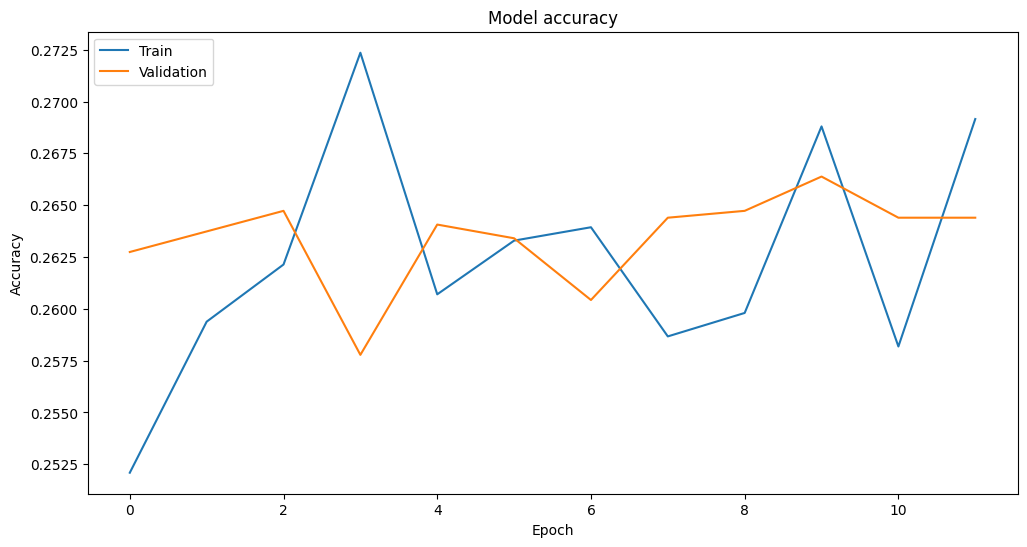

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_final_model.history['accuracy'])
plt.plot(history_final_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

pred_labels = final_model.predict(test_X_rgb)
pred_labels = [np.argmax(i) for i in pred_labels]

test_labels_rgb = [np.argmax(i) for i in test_Y_rgb]

print(classification_report(test_labels_rgb, pred_labels))

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:__** After the 1st epoch, the validation and training accuracies stayed relatively constant, dipping up and down slightly. This shows that the training isn't as effective, which makes sense given the fact that the layers in the imported model are kept constant

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D

tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
layer_name = 'conv5_block3_out'  
desired_layer = base_model.get_layer(layer_name)

x = desired_layer.output
x = GlobalAveragePooling2D()(x)  
x = Dense(1024, activation='relu')(x)  
predictions = Dense(4, activation='softmax')(x)

final_model = Model(inputs=base_model.input, outputs=predictions)

### **Compiling and Training the Model**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_final_model = final_model.fit(
    train_X_rgb,
    train_Y_rgb, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 49s 174ms/step - loss: 1.8364 - accuracy: 0.2496 - val_loss: 1.7279 - val_accuracy: 0.2164
Epoch 2/20
75/75 [==============================] - 9s 124ms/step - loss: 1.4057 - accuracy: 0.2564 - val_loss: 1.3884 - val_accuracy: 0.2677
Epoch 3/20
75/75 [==============================] - 10s 140ms/step - loss: 1.4036 - accuracy: 0.2422 - val_loss: 8.8348 - val_accuracy: 0.2697
Epoch 4/20
75/75 [==============================] - 9s 124ms/step - loss: 1.3892 - accuracy: 0.2628 - val_loss: 1.3857 - val_accuracy: 0.2604
Epoch 5/20
75/75 [==============================] - 9s 122ms/step - loss: 1.3855 - accuracy: 0.2668 - val_loss: 1.3816 - val_accuracy: 0.2637
Epoch 6/20
75/75 [==============================] - 9s 124ms/step - loss: 1.3856 - accuracy: 0.2604 - val_loss: 1.3818 - val_accuracy: 0.2641
Epoch 7/20
75/75 [==============================] - 9s 123ms/step - loss: 1.3824 - accuracy: 0.2562 - val_loss: 1.3837 - val_accuracy: 0.2644
Epoc

### **Evaluating the ResNet Model**

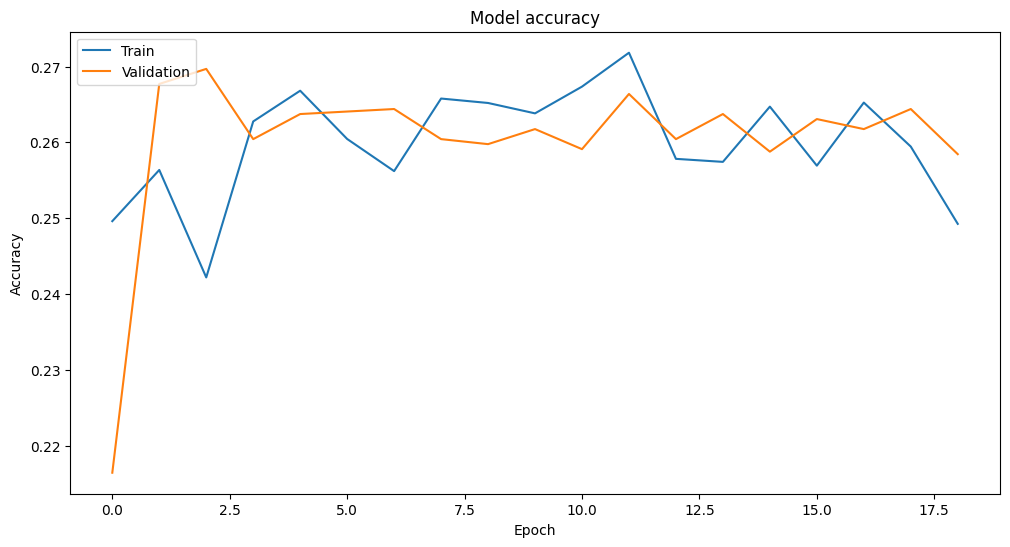

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_final_model.history['accuracy'])
plt.plot(history_final_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

pred_labels = final_model.predict(test_X_rgb)
pred_labels = [np.argmax(i) for i in pred_labels]

test_labels_rgb = [np.argmax(i) for i in test_Y_rgb]

print(classification_report(test_labels_rgb, pred_labels))

**Observations and Insights:__** Similar to the other transfer learning model, this model's validation and training accuracy did not go up that much with training, and plateaued relatively early on. This makes sense as we are using pretrained weights


**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
tf.keras.backend.clear_session()

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
layer_name = 'block7a_project_bn'  
desired_layer = base_model.get_layer(layer_name)

x = desired_layer.output
x = GlobalAveragePooling2D()(x)  
x = Dense(1024, activation='relu')(x)  
predictions = Dense(4, activation='softmax')(x)  

final_model = Model(inputs=base_model.input, outputs=predictions)

### **Compiling and Training the Model**

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_final_model = final_model.fit(
    train_X_rgb,
    train_Y_rgb, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 58s 202ms/step - loss: 1.5219 - accuracy: 0.2478 - val_loss: 1.5361 - val_accuracy: 0.2482
Epoch 2/20
75/75 [==============================] - 12s 164ms/step - loss: 1.4096 - accuracy: 0.2633 - val_loss: 1.6035 - val_accuracy: 0.2627
Epoch 3/20
75/75 [==============================] - 12s 164ms/step - loss: 1.3816 - accuracy: 0.2880 - val_loss: 1.4047 - val_accuracy: 0.2766
Epoch 4/20
75/75 [==============================] - 12s 164ms/step - loss: 1.3830 - accuracy: 0.2780 - val_loss: 1.3881 - val_accuracy: 0.2737
Epoch 5/20
75/75 [==============================] - 12s 164ms/step - loss: 1.3621 - accuracy: 0.3152 - val_loss: 1.4265 - val_accuracy: 0.2697
Epoch 6/20
75/75 [==============================] - 12s 164ms/step - loss: 1.3696 - accuracy: 0.3090 - val_loss: 1.3992 - val_accuracy: 0.2694
Epoch 7/20
75/75 [==============================] - 12s 164ms/step - loss: 1.3380 - accuracy: 0.3544 - val_loss: 1.5048 - val_accuracy: 0.2300

### **Evaluating the EfficientnetNet Model**

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history_final_model.history['accuracy'])
plt.plot(history_final_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

pred_labels = final_model.predict(test_X_rgb)
pred_labels = [np.argmax(i) for i in pred_labels]

test_labels_rgb = [np.argmax(i) for i in test_Y_rgb]

print(classification_report(test_labels_rgb, pred_labels))

NameError: ignored

<Figure size 1200x600 with 0 Axes>

**Observations and Insights:__** For this model, the training accuracy kept increasing as the epochs went on, however the validation error platuaued, showing that the model was beggining to overfit.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
image_size = (256, 256)
batch_size = 1

# Load training dataset
train_dir = "/tmp/Facial_emotion_images/train"
train_ds_gray = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale")


# Load test dataset
test_dir = "/tmp/Facial_emotion_images/test"
test_ds_gray = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale')



def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=4)
    return image, label

# Apply one_hot_encode function to the datasets
train_ds_gray = train_ds_gray.map(one_hot_encode)
test_ds_gray = test_ds_gray.map(one_hot_encode)

train_X_gray = image_array(train_ds_gray)
train_Y_gray = label_array(train_ds_gray)

test_X_gray= image_array(test_ds_gray)
test_Y_gray = label_array(test_ds_gray)



Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 1)))
    model.add(LeakyReLU(alpha=0.1))

    for i in range(5):
      model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))  
      model.add(BatchNormalization())  
      model.add(LeakyReLU(alpha=0.1))  

    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    
    for i in range(5):
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))  
        model.add(BatchNormalization())  
        model.add(LeakyReLU(alpha=0.1)) 

    model.add(MaxPooling2D(pool_size=(2, 2)))

    
    model.add(Flatten())  
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

cnn_model = cnn_model()

print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      9280      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      36928     
                                                        

### **Compiling and Training the Model**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)

history_cnn_model = cnn_model.fit(
    train_X_gray,
    train_Y_gray, 
    steps_per_epoch=steps_per_epoch,
    batch_size = 75,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
75/75 [==============================] - 48s 511ms/step - loss: 21.5794 - accuracy: 0.2661 - val_loss: 200.2083 - val_accuracy: 0.2651
Epoch 2/20
75/75 [==============================] - 31s 418ms/step - loss: 1.8157 - accuracy: 0.2604 - val_loss: 2.2890 - val_accuracy: 0.2647
Epoch 3/20
75/75 [==============================] - 32s 429ms/step - loss: 1.6709 - accuracy: 0.2549 - val_loss: 3.5138 - val_accuracy: 0.2687
Epoch 4/20
75/75 [==============================] - 31s 418ms/step - loss: 1.5407 - accuracy: 0.2711 - val_loss: 1.5809 - val_accuracy: 0.2697
Epoch 5/20
75/75 [==============================] - 31s 414ms/step - loss: 1.6057 - accuracy: 0.2702 - val_loss: 1.7268 - val_accuracy: 0.2644
Epoch 6/20
75/75 [==============================] - 31s 418ms/step - loss: 1.6519 - accuracy: 0.2619 - val_loss: 1.4050 - val_accuracy: 0.2720
Epoch 7/20
75/75 [==============================] - 31s 414ms/step - loss: 1.4940 - accuracy: 0.2575 - val_loss: 1.6588 - val_accuracy: 0.2

### **Evaluating the Model on Test Set**

In [ ]:
pred_cnn_model = cnn_model.predict(test_X_gray)
pred_cnn_model = [np.argmax(i) for i in pred_cnn_model]

test_labels_gray = [np.argmax(i) for i in test_Y_gray]

print(classification_report(test_labels_gray, pred_cnn_model))

4/4 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       0.28      0.72      0.40        32
           1       0.28      0.28      0.28        32
           2       0.38      0.16      0.22        32
           3       0.00      0.00      0.00        32

    accuracy                           0.29       128
   macro avg       0.24      0.29      0.23       128
weighted avg       0.24      0.29      0.23       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observations and Insights:__** The precision, f1, and recall is similar to my 2nd CNN model. For some reason, there is nothing showing up for the 3rd class (surpised), however it was showing up for my original CNN models. Overall, this model doesn't seem to be much of an imporvement compared to my 2nd CNN model

### **Plotting the Confusion Matrix for the chosen final model**

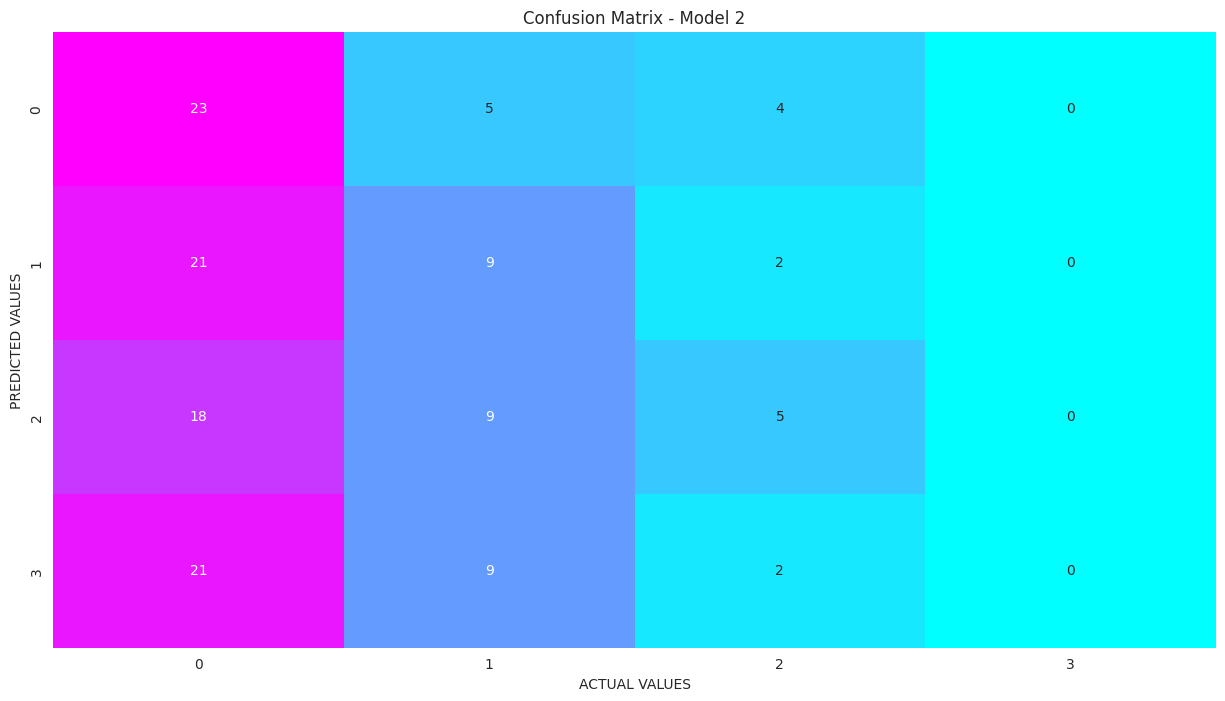

In [ ]:
sns.set_style("dark")


plt.figure(figsize = (15, 8))

plt.title("Confusion Matrix - Model 2")

cm = confusion_matrix([int(x) for x in test_labels_gray], pred_cnn_model)

sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

plt.show()

**Observations and Insights:__** The model performs relatively poorly, and again for some reason the 3rd class doesn't appear to be in the testset, when it was in the testset earlier

## **Conclusion:____________** The different model types performed relatively similarly, as their accuracies were all around 25. The highest accuracy was the 3rd CNN, with an overall accuracy of 0.29. To improve performance further, we can change hyperparameters, increase epochs (esp for the CNN models as it doesn't seem as if thye were overfitting as much compared to the transfer models), and change architecutre of the models. I propose to adopt the 3rd CNN model as that had the best performance across the board in all 3 metrics. The 3rd model performed the best likely because all of its parameters were trained on the data, and it was the largest model. A room for improvement is to use a larger model, as the CNN models did not seem complex enough to capture the relevant features (it was underfitting)

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?